# Question 1

In [5]:
import numpy as np
import itertools

# X = (hours studying, hours sleeping), y = score on test, xPredicted = 4 hours studying & 8 hours sleeping (input data for prediction)
X = np.array(([1, 3, 7]), dtype=float)
y = np.array(([1, 0, 0]), dtype=float)
#xPredicted = np.array(([4,8,5]), dtype=float) ## test data
# scale units

X = X/X.max()
#xPredicted=xPredicted/X.max()


class Neural_Network(object):
  def __init__(self, learning_rate=1, bias=np.array(([1,1,1],[1,1,1]), dtype=float)):
    self.inputSize = 3
    self.outputSize = 3
    self.hiddenSize = 3
    self.lr = learning_rate
    self.bias = bias

  #weights
    self.W1 = np.array(([0.2, 0.3, 0.5],[0.3, 0.5, 0.7],[0.6, 0.4, 0.8]), dtype=float) # (3x3) weight matrix from input to hidden layer
    self.W2 = np.array(([0.1,0.4,0.8],[0.3,0.7,0.2], [0.5,0.2,0.9]), dtype=float) 
    self.reset() ## call reset to reset the instance after each combinations of hyper parameters

  def reset(self):
    self.lr = self.lr
    self.bias = np.array(([1,1,1],[1,1,1]), dtype=float)

  #weights
    self.W1 = np.array(([0.2, 0.3, 0.5],[0.3, 0.5, 0.7],[0.6, 0.4, 0.8]), dtype=float) # (3x3) weight matrix from input to hidden layer
    self.W2 = np.array(([0.1,0.4,0.8],[0.3,0.7,0.2], [0.5,0.2,0.9]), dtype=float) # (3x3) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) + self.bias[0]# dot product of X (input) and first set of 3x3 weights, return 1x3
    self.z2 = self.sigmoid(self.z) # activation function, return 1x3
    self.z3 = np.dot(self.z2, self.W2) + self.bias[1]# dot product of hidden layer (z2) and second set of 3x3 weights, return 1x3
    o = self.softmax(self.z3) # final activation function, solfmax
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def softmax(self, s):
        exps=np.exp(s - np.max(s))
        return exps/np.sum(exps) ## minus np.max(s) to make the solfmax more stable 
    #https://deepnotes.io/softmax-crossentropy
    
  def sigmoidPrime(self, s):
    #derivative of sigmoid
    sig=self.sigmoid(s)
    return sig * (1 - sig)

  def softmaxPrime(self,s):
    smax = self.softmax(s)
    return smax*(1-smax)

  def cross_entropy(self,y,o):
        return -(y*np.log(o)+(1-y)*np.log(1-o)).sum() ##
    
  def cross_entropyPrime(self,y,o):
     return (o-y)/o.dot(1-o)

  def backward(self, X, y, o):
    # backward propagate through the network #)
    self.o_error = self.cross_entropy(y,o)# error in output, one number
    self.o_delta = self.o_error*self.cross_entropyPrime(y,o)*self.softmaxPrime(o) # applying derivative of cross_entropy, softmaxPrime to error, 1x3

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error, 1x3
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 -= self.lr*X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 -= self.lr*self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights
    
    self.bias[0]-=self.lr*self.z2_delta ## adjust error for the W1
    self.bias[1]-=self.lr*self.o_delta ## adjust error for W2
    

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1_hw4.txt", self.W1, fmt="%s")
    np.savetxt("w2_hw4.txt", self.W2, fmt="%s")

  def predict(self):
    print ("Predicted data based on trained weights: ")
    print ("Input (scaled): \n" + str(xPredicted))
    #print ("Output: \n" + str(self.forward(xPredicted)));
NN = Neural_Network()
for i in range(0,10): # trains the NN 1,000 times
  print("# " + str(i) + "\n")
  print("Input (scaled): \n" + str(X))
  print("Actual Output: \n" + str(y))
  print("Predicted Output: \n" + str(NN.forward(X)))
  print ("\n")
  NN.train(X, y)

# 0

Input (scaled): 
[0.14285714 0.42857143 1.        ]
Actual Output: 
[1. 0. 0.]
Predicted Output: 
[0.20953649 0.28928105 0.50118246]


# 1

Input (scaled): 
[0.14285714 0.42857143 1.        ]
Actual Output: 
[1. 0. 0.]
Predicted Output: 
[0.44460227 0.2361194  0.31927833]


# 2

Input (scaled): 
[0.14285714 0.42857143 1.        ]
Actual Output: 
[1. 0. 0.]
Predicted Output: 
[0.55373912 0.19513617 0.25112471]


# 3

Input (scaled): 
[0.14285714 0.42857143 1.        ]
Actual Output: 
[1. 0. 0.]
Predicted Output: 
[0.62381439 0.16688792 0.20929768]


# 4

Input (scaled): 
[0.14285714 0.42857143 1.        ]
Actual Output: 
[1. 0. 0.]
Predicted Output: 
[0.67341084 0.1462345  0.18035466]


# 5

Input (scaled): 
[0.14285714 0.42857143 1.        ]
Actual Output: 
[1. 0. 0.]
Predicted Output: 
[0.71064987 0.13042359 0.15892654]


# 6

Input (scaled): 
[0.14285714 0.42857143 1.        ]
Actual Output: 
[1. 0. 0.]
Predicted Output: 
[0.73977592 0.1178933  0.14233077]


# 7

Input (scaled):

## Try different hyper parameters

In [6]:
from collections import defaultdict
learning_rate = [0.5, 10]
iterations = [10, 1000]
all_loss = defaultdict(list)
# permutations between these two parameters
hyper_parameters = list(itertools.product(learning_rate,iterations)) 
hyper_parameters[0][1]
print("Input (scaled): \n" + str(X))
print("Actual Output: \n" + str(y))

for p in hyper_parameters:
    #print("With learning rate {} and iterations {}".format(p[0], p[1]))
    t = '_'.join([str(p[0]), str(p[1])])
    NN = ''.join(['NN','t'])
    NN = Neural_Network(learning_rate=p[0])
    
    for i in range(0,p[1]): # save all the loss to default dictionary
        all_loss[t].append(NN.cross_entropy(y, NN.forward(X)))
        NN.train(X, y)
    NN.reset()
      



Input (scaled): 
[0.14285714 0.42857143 1.        ]
Actual Output: 
[1. 0. 0.]


## Plot the loss vs. iterations at different learning rate

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.size'] = 16
def plot_loss(tt, title = 'Loss change over iterations'):
    """tt is a 2d array to for the loss"""
    plt.scatter(tt[:,0], tt[:,1])
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()
    

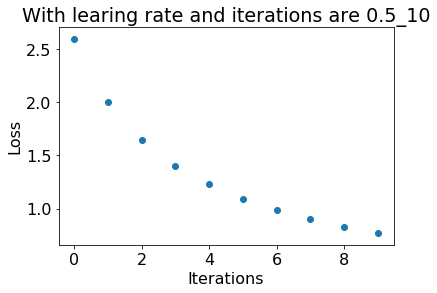

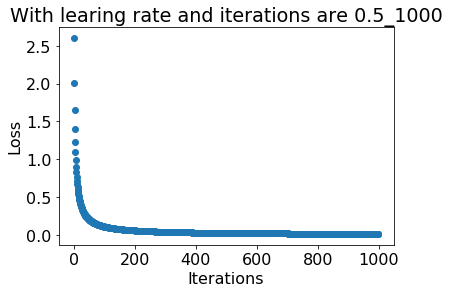

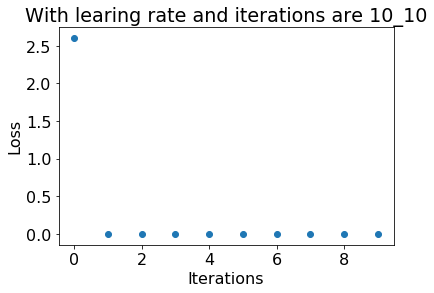

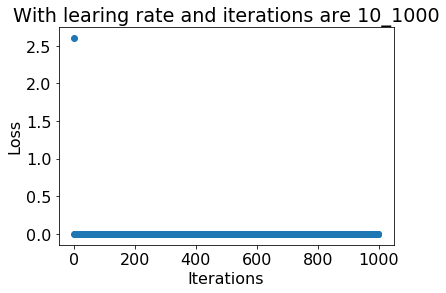

In [8]:
for key in all_loss.keys():
    tt = np.array([(i,c) for i, c in enumerate(all_loss[key])])
    plot_loss(tt, title='With learing rate and iterations are {}'.format(key) )

## Explaination
With lower learning rate, it takes many more iterations to converge. This explains why 1000 iterations has a much lower loss than 10 iterations when the learning rate is 0.1.
With a higher learning rate, the loss decreases much faster in terms of loss and we don't need that many iterations.


# Question 2